In [6]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Produce knn boundary graphs
from sklearn.inspection import DecisionBoundaryDisplay
import seaborn

# Import datatypes for parameter type specification
from pandas.core import frame
from sklearn.preprocessing._label import LabelEncoder

In [7]:
# read scaled data for non-target attributes
X = pd.read_csv("X.csv")
MIN = pd.read_csv("MIN.csv")
MAX = pd.read_csv("MAX.csv")

# read the target attribute
y = pd.read_csv("y.csv")
display(y)

,model
0,Fiesta
1,Focus
2,Focus
3,Fiesta
4,Fiesta
...,...
17960,Fiesta
17961,B-MAX
17962,B-MAX
17963,Focus


In [8]:
# encode a single column from a dataframe
def encode_y(y:frame.DataFrame) -> dict:
    y = y.squeeze()
    labEnc_y = LabelEncoder()
    labEnc_y = labEnc_y.fit(y)
    y = pd.DataFrame(labEnc_y.transform(y), columns=[y.name])
    return dict(y=y,encoder=labEnc_y)

def unencode_y(y:frame.DataFrame, encoder:LabelEncoder):
    # use sklearn.preprocessing.LabelEncoder.inverse_transform() 
    # to revert the encoded data
    y = y.squeeze()
    return(pd.DataFrame(encoder.inverse_transform(y), columns=[y.name]))

# study interactions

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [10]:
encode_yItem = encode_y(y_train)
labels_train = encode_yItem.get("y")
encoder = encode_yItem.get("encoder")

,model
15558,Fiesta
17345,Fiesta
15102,Focus
10284,Focus
6686,Kuga


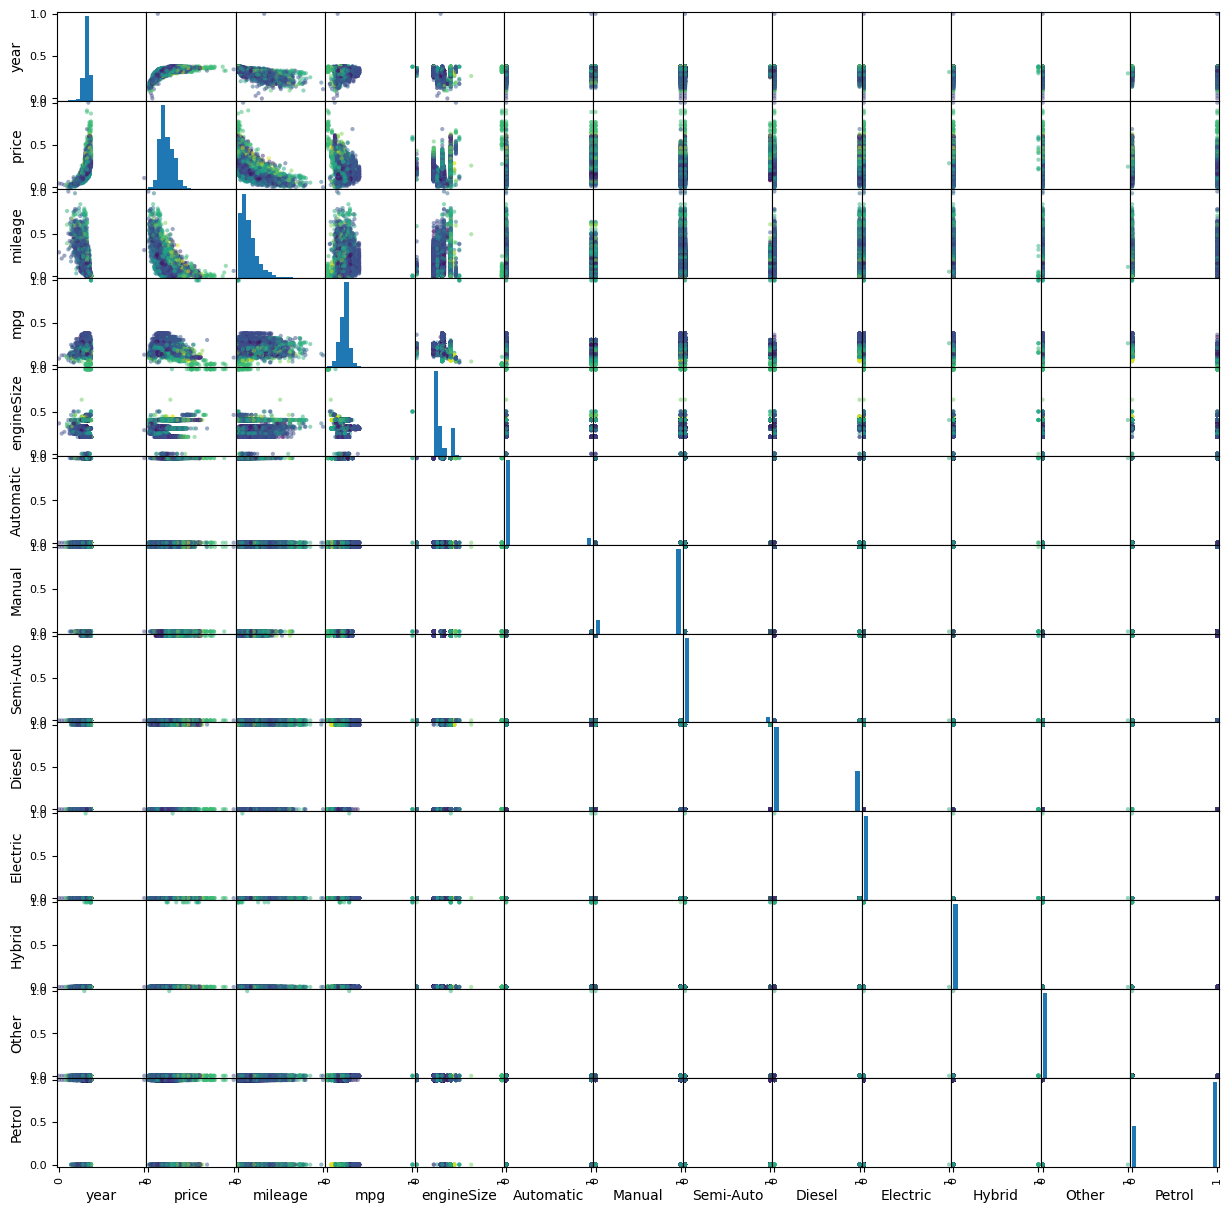

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [11]:
display(y_train.head())
pd.plotting.scatter_matrix(X_train,
                           c=labels_train.squeeze(),
                           hist_kwds={'bins':20},
                           figsize=(15,15))
plt.show()
print(type(y_train), type(y_test))

# Plot a 2d knn as an example

### Select two attributes for the KNN model

In [12]:
names = ["mpg", "price"]
X2d = X_train.loc[:, [names[0],names[1]]]
y_train = np.ravel(y_train)
print(y_train)


[' Fiesta' ' Fiesta' ' Focus' ... ' Fiesta' ' Kuga' ' Kuga']


### Build the model from the training set
- show boundaries for the trained model.
- points from the training set are labeled based on the car models

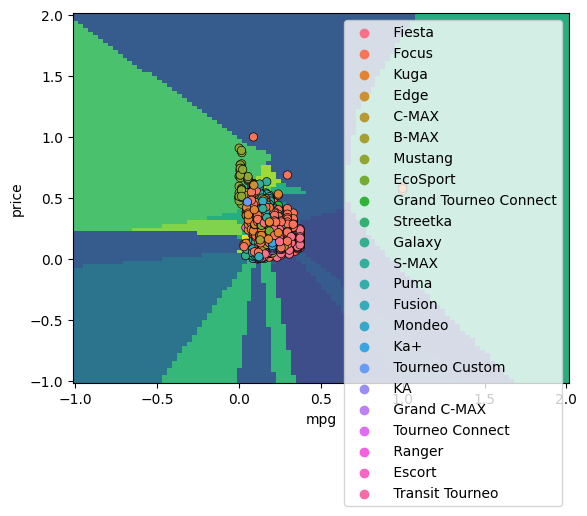

In [13]:
knn = KNeighborsClassifier(n_neighbors=1, weights="distance")
knn.fit(X2d, y_train)
_, ax = plt.subplots()

DecisionBoundaryDisplay.from_estimator(
    knn,
    X2d,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    xlabel=names[0],
    ylabel=names[1],
    shading="auto",
)

# Plot also the training points
seaborn.scatterplot(
    x=X2d[names[0]],
    y=X2d[names[1]],
    hue=y_train,
    alpha=1.0,
    edgecolor="black",
)
plt.show()


# Assess accuracy for the sample KNN model

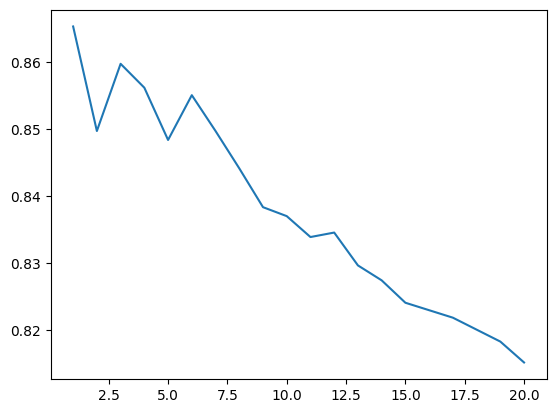

In [14]:
arr = np.array([])
y_test = y_test.squeeze()
for n in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_test)
    m = np.mean(y_predict == y_test)
    arr = np.append(arr, np.array(m))
plt.plot(range(1,arr.size+1), arr)
plt.show()


array([' Focus', ' Mondeo', ' Tourneo Custom', ' Kuga', ' Grand C-MAX',
       ' B-MAX', ' KA', ' EcoSport', ' C-MAX', ' Ka+', ' Fiesta',
       ' S-MAX', ' Mustang', ' Galaxy', ' Tourneo Connect',
       ' Grand Tourneo Connect', ' Edge', ' Fusion'], dtype=object)

(830,)

830

[0.12943262 0.59166667 0.88235294 0.08623549 0.68965517 0.7816092
 0.5625     0.18241042 0.53435115 0.05042017 0.08435961 0.85915493
 0.33333333 0.67647059 1.         1.         0.09803922 1.        ]


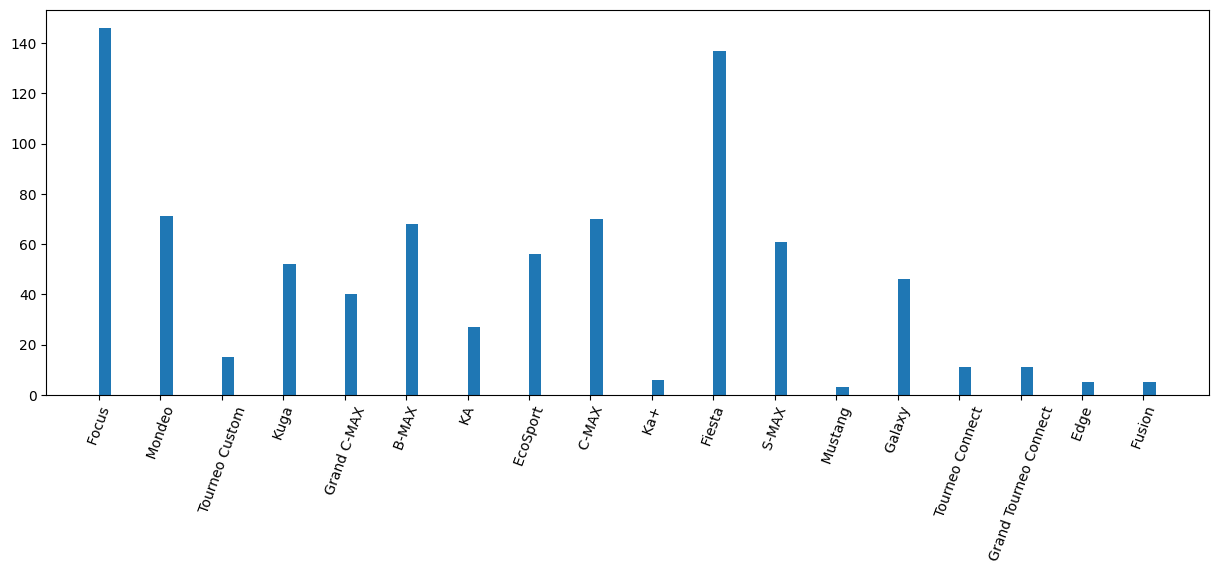

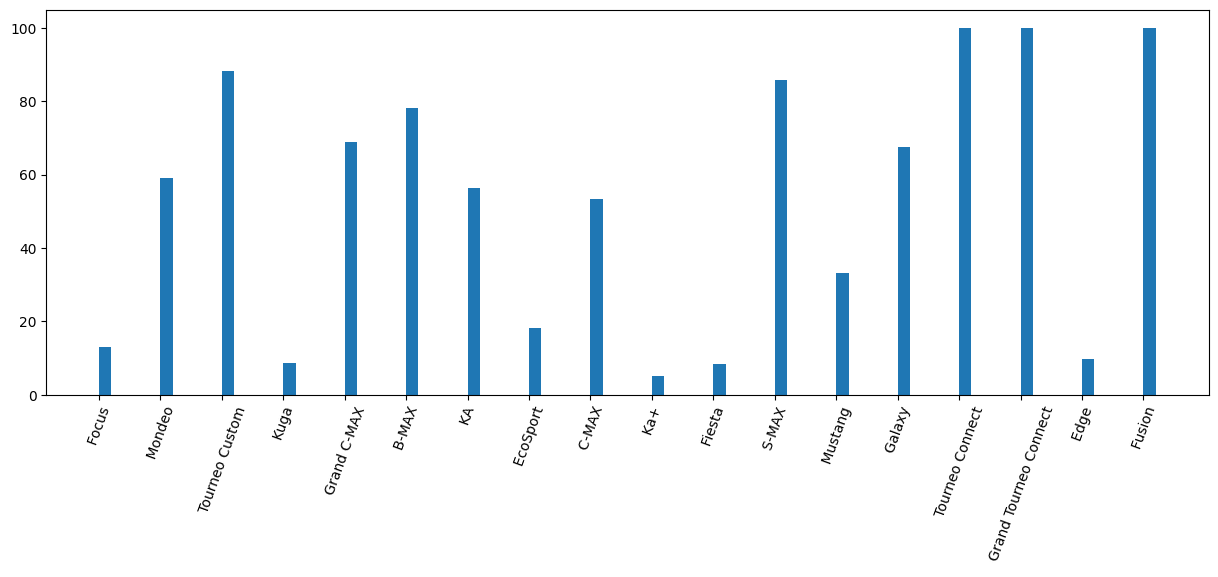

In [15]:
misclassified = y_test[y_test != y_predict]
names = misclassified.unique()
sum = 0
error_counts = np.array([])
name_counts = np.array([])
for name in names:
    errors = misclassified[misclassified == name].shape[0]
    sum += errors
    error_counts = np.append(error_counts, np.array(errors))
    name_total = y_test[y_test == name].shape[0]
    name_counts = np.append(name_counts, np.array(name_total))
display(misclassified.unique(), misclassified.shape, sum)

print(error_counts / name_counts)
error_percentage = 100 * error_counts / name_counts



# Plot misclassifications
plt.figure(figsize=(15, 5))
plt.bar(range(error_counts.size), height=error_counts, align='edge', width=0.2)
plt.xticks(range(error_counts.size), misclassified.unique(), rotation=70)
plt.show()

plt.figure(figsize=(15, 5))
plt.bar(range(error_counts.size), height=error_percentage, align='edge', width=0.2)
plt.xticks(range(error_counts.size), misclassified.unique(), rotation=70)
plt.show()